In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
car=pd.read_csv('car_evaluation (1).csv')
car.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
car.shape

(1728, 7)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   outcome   1728 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [5]:
car.describe(include='object')

,buying,maint,lug_boot,safety,outcome
count,1728,1728,1728,1728,1728
unique,4,4,3,3,4
top,med,med,med,med,unacc
freq,432,432,576,576,1210


In [6]:
car.describe()

,doors,persons
count,1728.000000,1728.000000
mean,3.500000,3.666667
std,1.118358,1.247580
min,2.000000,2.000000
25%,2.750000,2.000000
50%,3.500000,4.000000
75%,4.250000,5.000000
max,5.000000,5.000000


In [7]:
car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
outcome     0
dtype: int64

In [8]:
car.outcome.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [9]:
X=car.iloc[:,:-1]
Y=car.outcome

In [10]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [11]:
X.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [12]:
X.safety.unique()

array(['low', 'med', 'high'], dtype=object)

In [13]:
X.lug_boot.unique()

array(['small', 'med', 'big'], dtype=object)

In [14]:
X.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder


In [16]:
enc = LabelEncoder()
X.buying = enc.fit_transform(X.buying)
X.maint=enc.fit_transform(X.maint)
X.lug_boot=enc.fit_transform(X.lug_boot)
X.safety=enc.fit_transform(X.safety)
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [17]:
X['buying'].unique()

array([3, 0, 2, 1])

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=50)

In [19]:
X.maint.unique()

array([3, 0, 2, 1])

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=50)

In [21]:
X_train.shape

(1296, 6)

In [22]:
X_test.shape

(432, 6)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
model = SVC()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8333333333333334

In [25]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         acc       0.60      0.54      0.57        87
        good       0.00      0.00      0.00        14
       unacc       0.88      0.98      0.93       315
       vgood       1.00      0.31      0.48        16

    accuracy                           0.83       432
   macro avg       0.62      0.46      0.49       432
weighted avg       0.80      0.83      0.81       432



E:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# bagging wine.csv

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
data=pd.read_csv("wine.csv")
data.head()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
data.tail()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   wine                          178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [31]:
data.describe()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [32]:
data.shape

(178, 14)

 #EDA

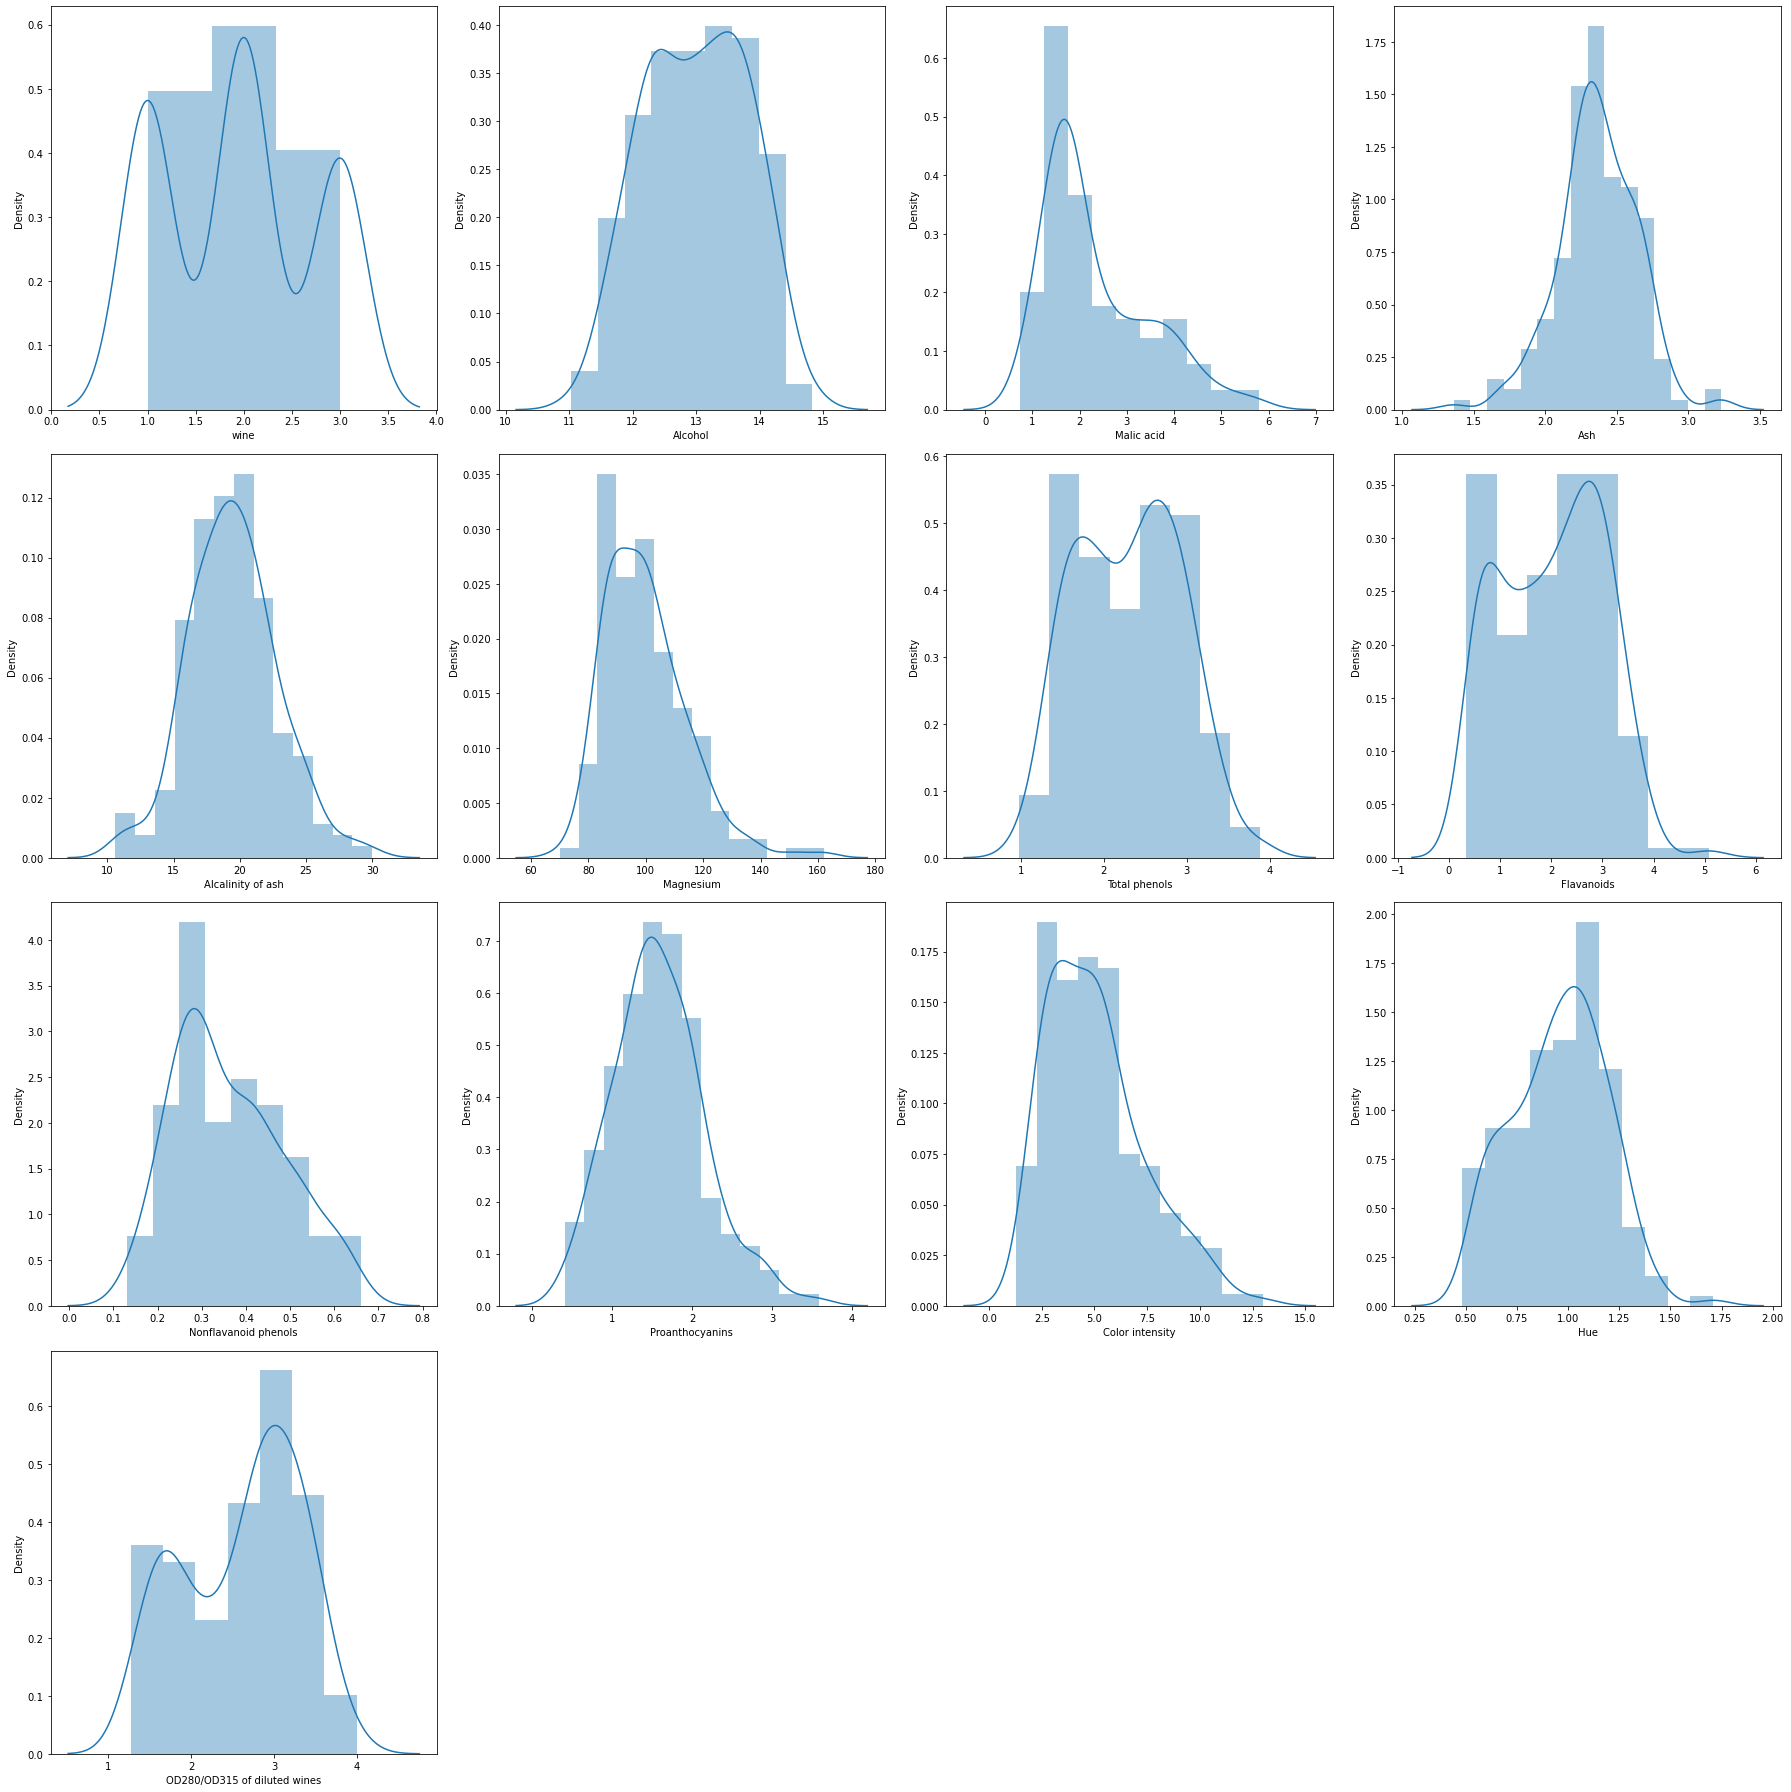

In [33]:
plt.figure(figsize=(25,25),facecolor='white')#canvas size
plotnum=1#counter
for c in data.columns:#columns form dataFrame
    if(plotnum<14):#checking whether counter less than 14
        a=plt.subplot(4,4,plotnum)#plotting 14 graph
        sns.distplot(data[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()

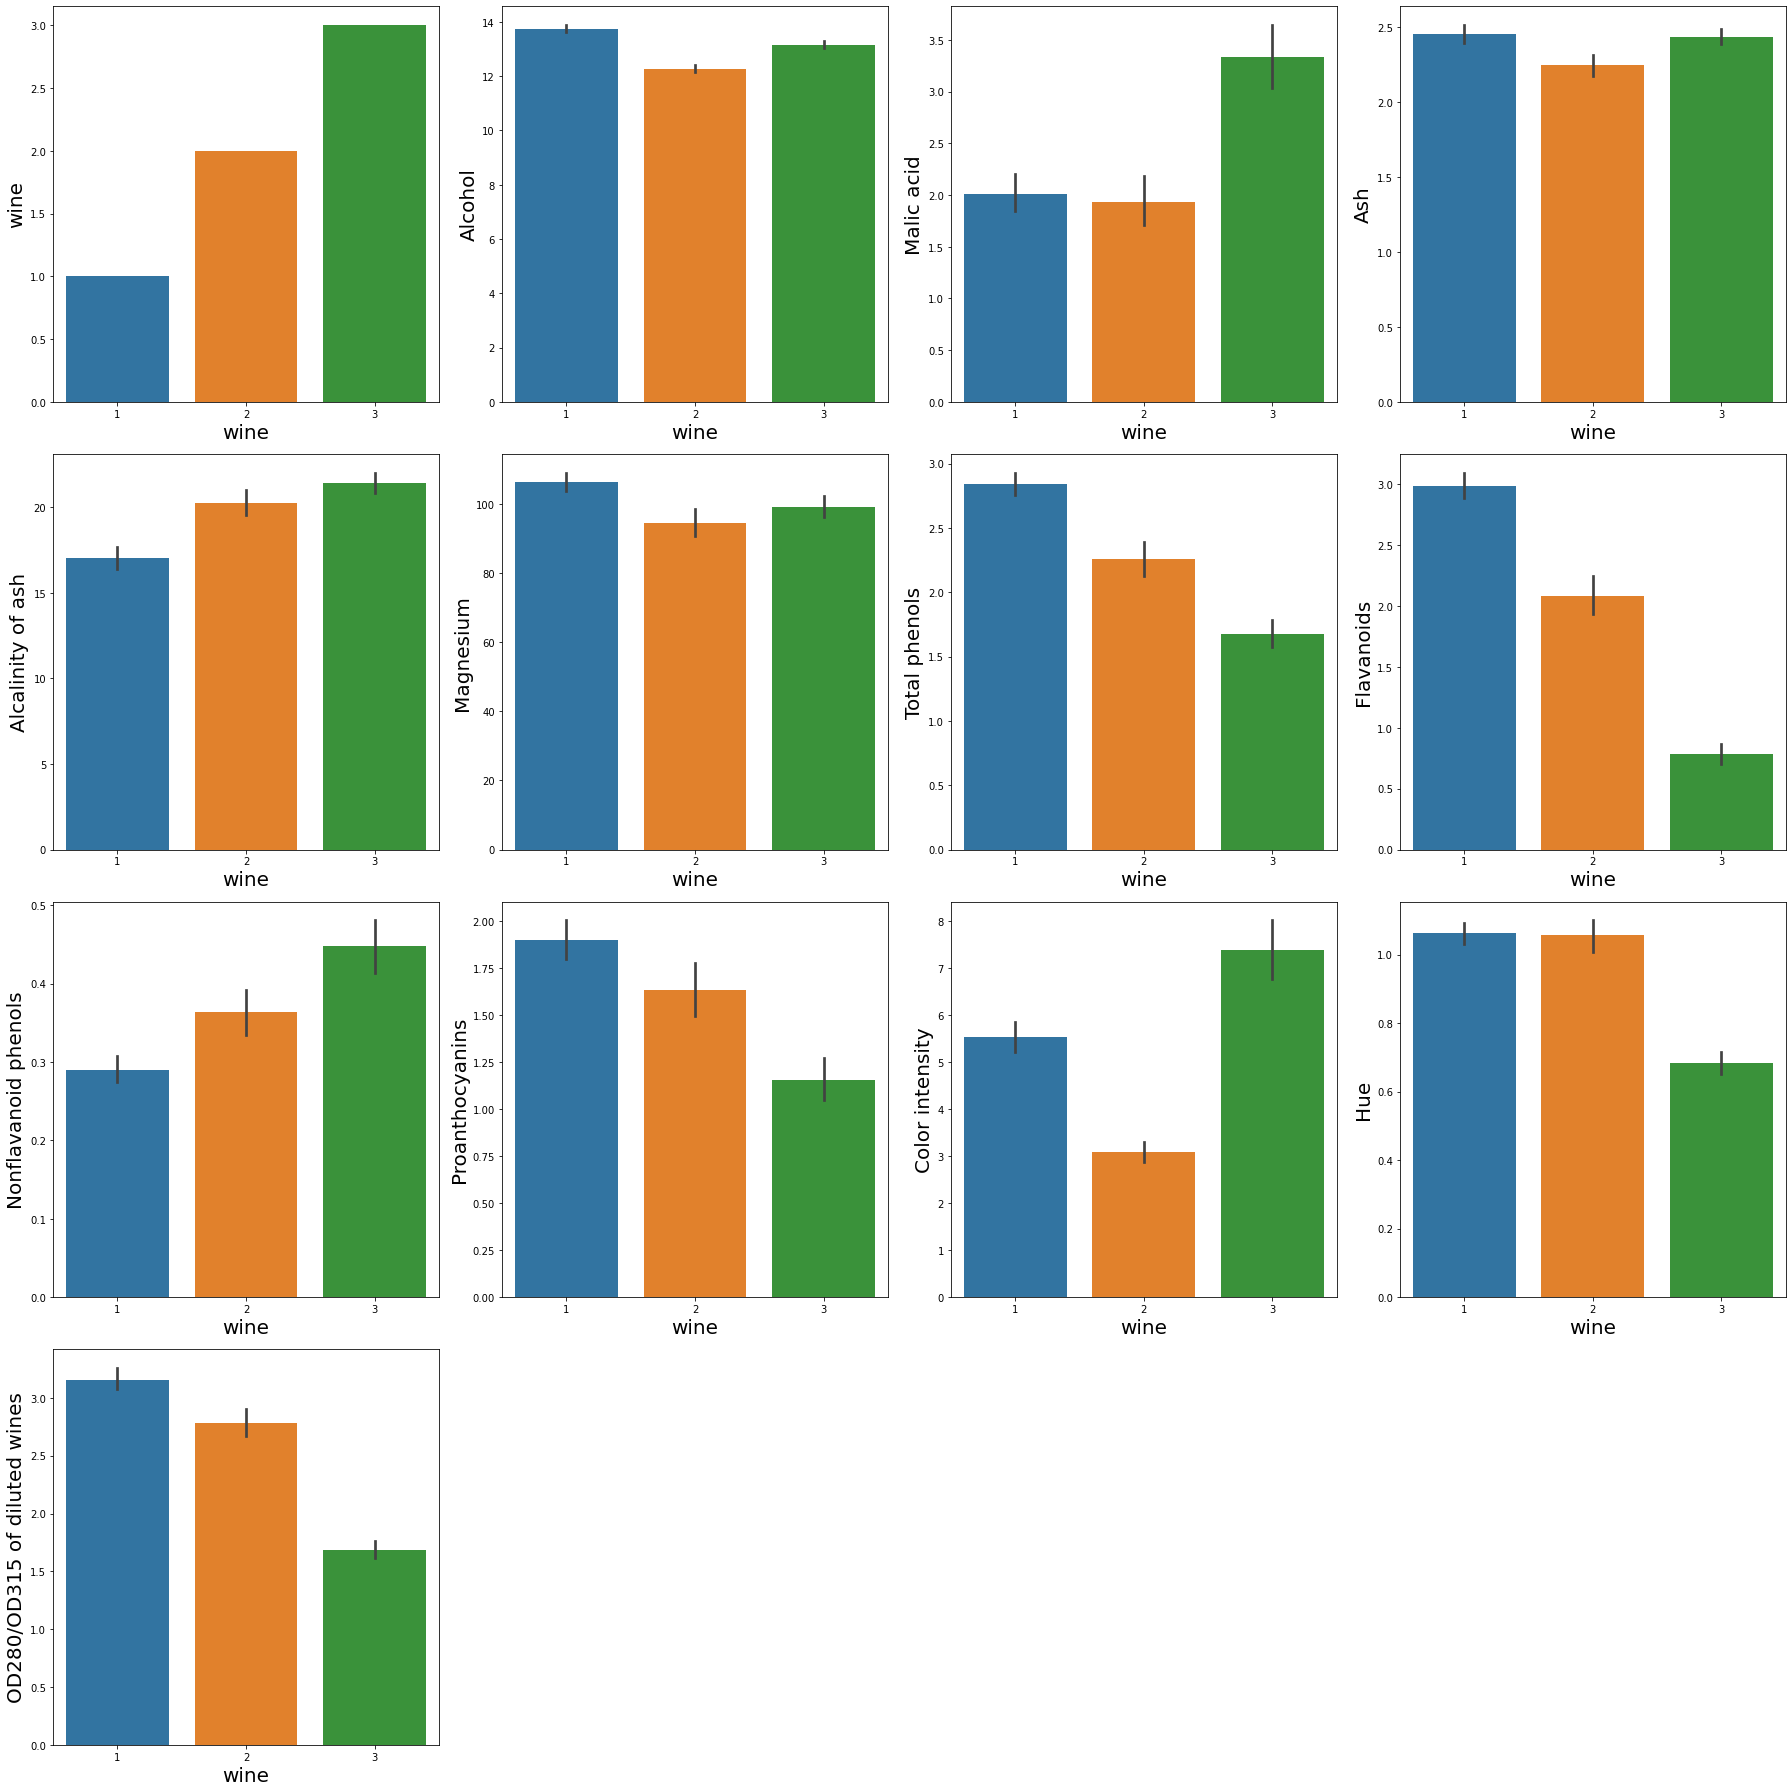

In [34]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in data.columns:
    if(plotnum<14):
        ax=plt.subplot(4,4,plotnum)
        sns.barplot(x=data.wine,y=data[c])
        plt.xlabel('wine',fontsize=20)
        plt.ylabel(c,fontsize=20)
        
    plotnum+=1
plt.tight_layout() 

In [35]:
#insights:   

# Data preprocessing
# Missing value checks and replacements
# Outlier detection and removal
# Encoding
# Scaling
# Target analysis- SMOTE

In [36]:
#Check for target variable
data.wine.value_counts()

2    71
1    59
3    48
Name: wine, dtype: int64

In [37]:
data.Alcohol.value_counts

<bound method IndexOpsMixin.value_counts of 0      14.23
1      13.20
2      13.16
3      14.37
4      13.24
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: Alcohol, Length: 178, dtype: float64>

In [38]:
data.isnull().sum()

wine                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

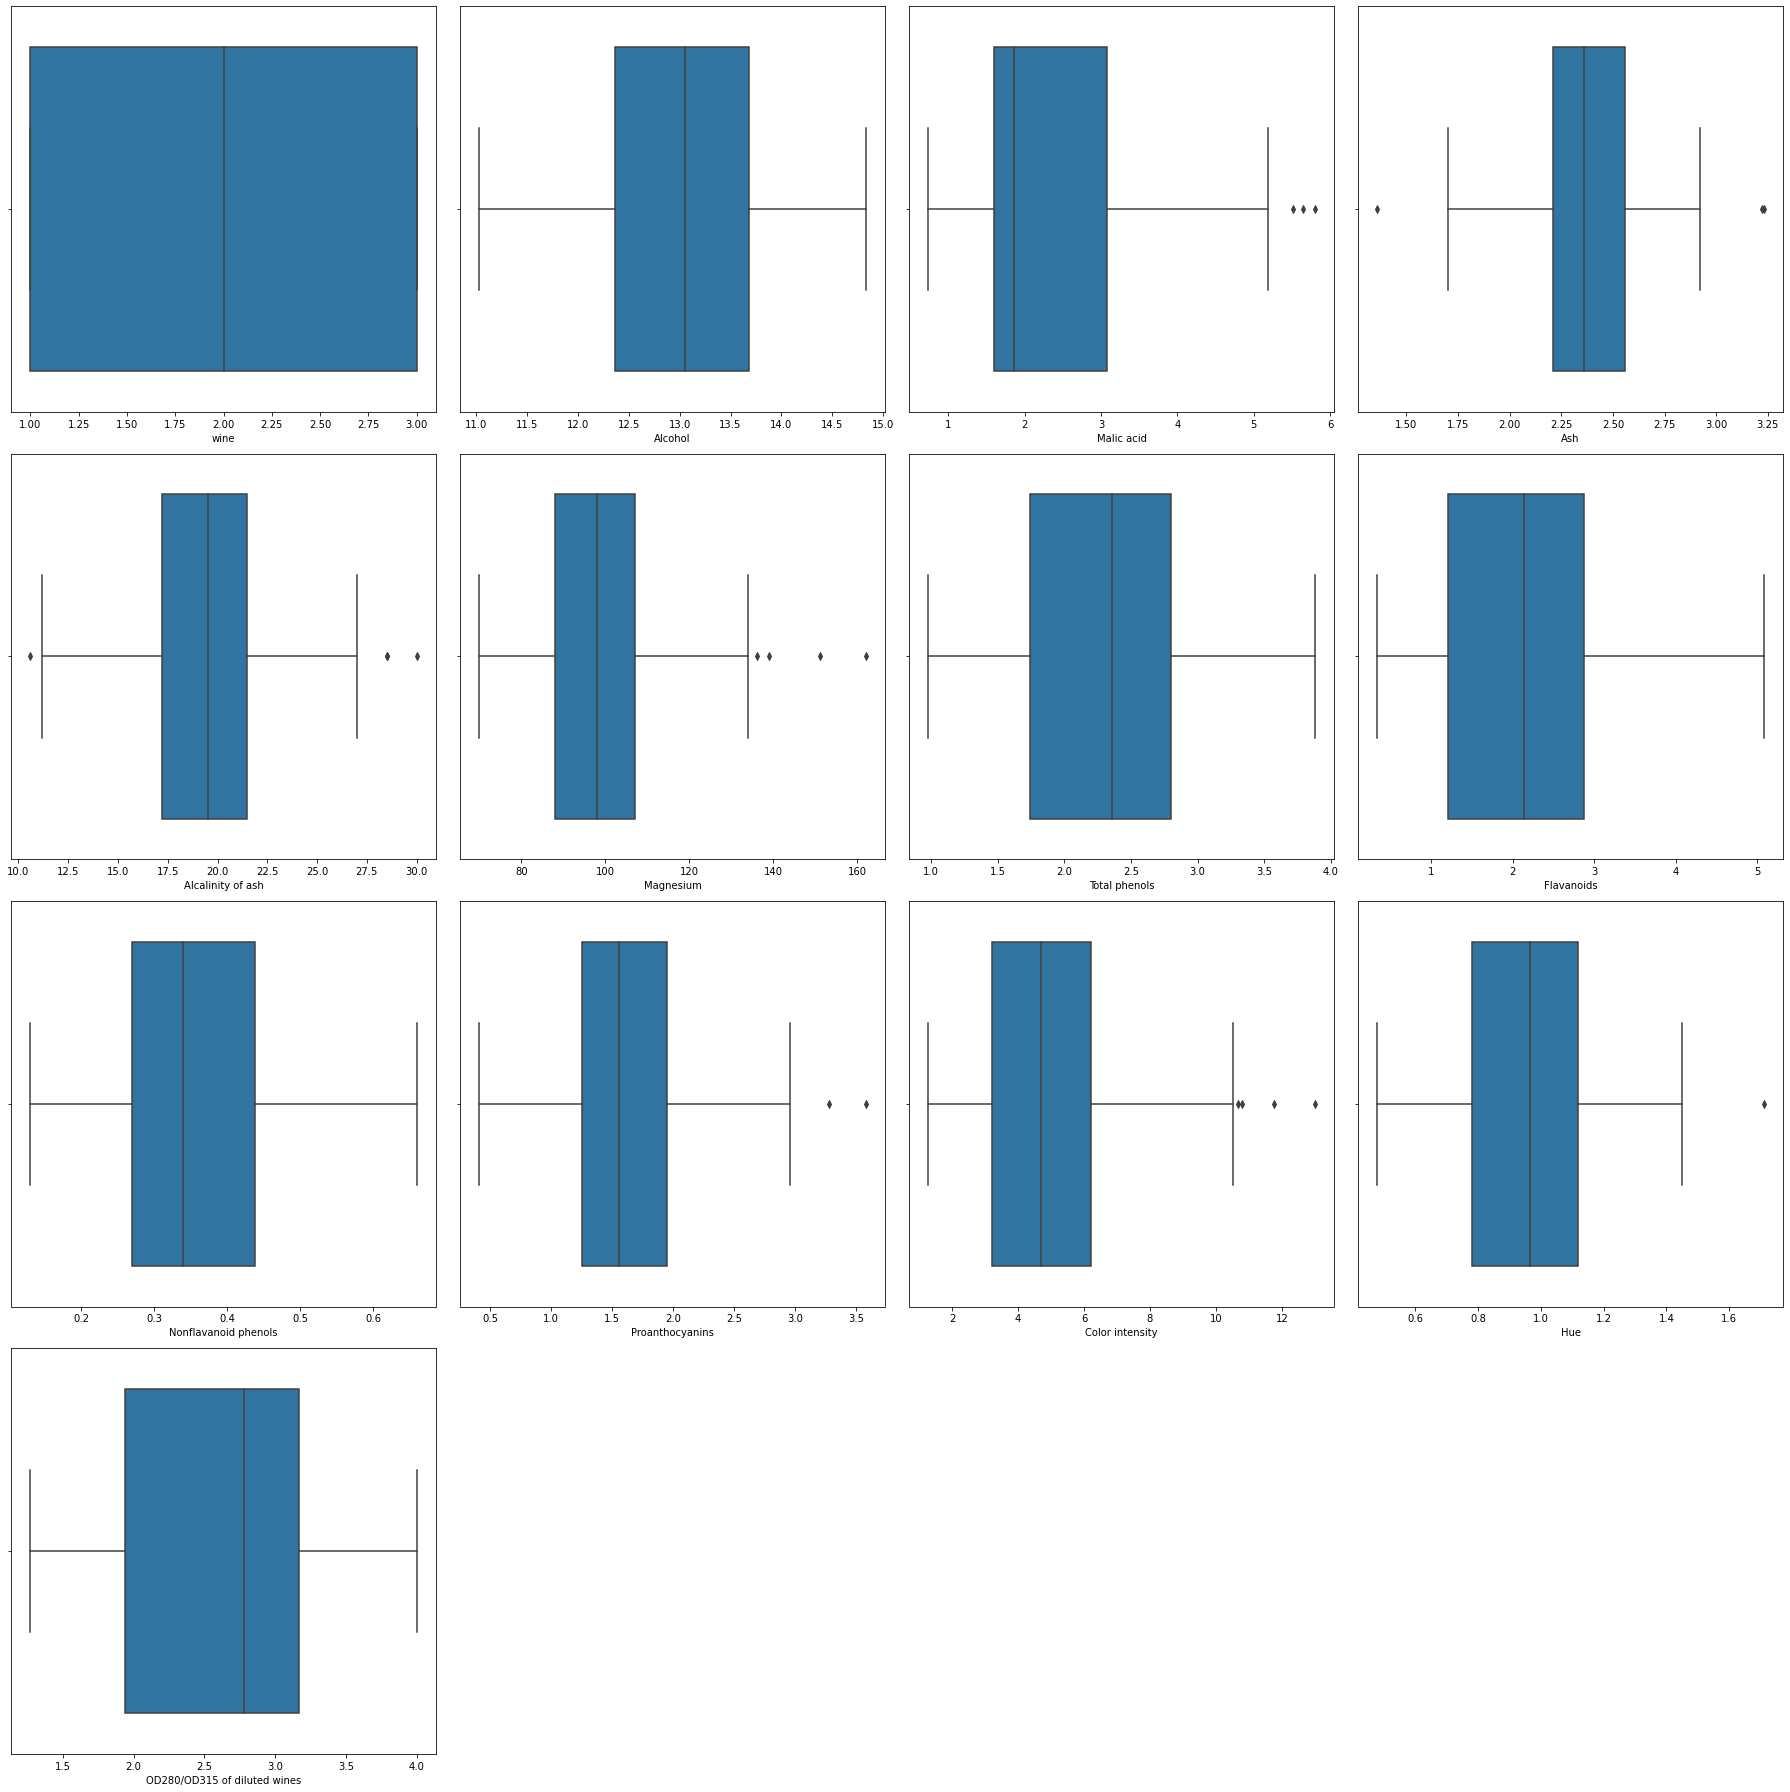

In [39]:
plt.figure(figsize=(25,25),facecolor='white')#canvas size
plotnum=1#counter
for c in data.columns:#columns form dataFrame
    if(plotnum<14):#checking whether counter less than 9
        a=plt.subplot(4,4,plotnum)#plotting 8 graph
        sns.boxplot(data[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout() 

In [40]:
data[data['Malic acid'] > 5.2]

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [41]:
np.mean(data["Malic acid"])

2.336348314606741

In [42]:
data.loc[data['Malic acid']>5.2]=(data['Malic acid'])=2

<AxesSubplot:xlabel='Malic acid'>

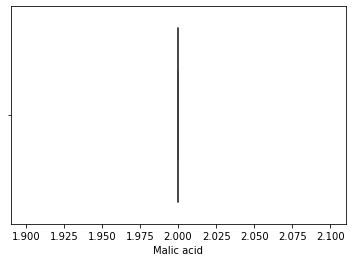

In [43]:
sns.boxplot(data['Malic acid'])

<AxesSubplot:xlabel='Malic acid'>

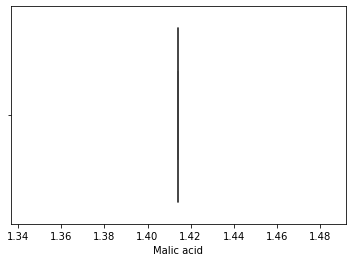

In [44]:
data['Malic acid']=np.sqrt(data['Malic acid'])
sns.boxplot(data['Malic acid'])

 #feature engineering and selection

In [45]:
data.corr()

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
wine,1.000000,-0.176852,NaN,-0.061572,0.416552,-0.163039,-0.716325,-0.845280,0.248902,-0.490580,0.256226,-0.521570,-0.781760,-0.612790
Alcohol,-0.176852,1.000000,NaN,0.253221,0.361748,0.677988,0.199010,0.125007,-0.791769,-0.010840,0.413505,-0.471369,0.135078,0.562403
Malic acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ash,-0.061572,0.253221,NaN,1.000000,0.456599,0.324214,0.147499,0.129994,-0.062234,0.003880,0.276430,-0.150284,0.035890,0.261680
Alcalinity of ash,0.416552,0.361748,NaN,0.456599,1.000000,0.325264,-0.227634,-0.282157,-0.342450,-0.210516,0.112131,-0.476829,-0.158211,-0.178531
Magnesium,-0.163039,0.677988,NaN,0.324214,0.325264,1.000000,0.202388,0.151296,-0.671702,0.117597,0.258312,-0.307988,0.124315,0.473760
Total phenols,-0.716325,0.199010,NaN,0.147499,-0.227634,0.202388,1.000000,0.862485,-0.274176,0.598681,-0.035143,0.339749,0.697321,0.498393
Flavanoids,-0.845280,0.125007,NaN,0.129994,-0.282157,0.151296,0.862485,1.000000,-0.266916,0.644552,-0.159614,0.464179,0.777941,0.480445
Nonflavanoid phenols,0.248902,-0.791769,NaN,-0.062234,-0.342450,-0.671702,-0.274176,-0.266916,1.000000,-0.097399,-0.081574,0.331756,-0.341544,-0.404695
Proanthocyanins,-0.490580,-0.010840,NaN,0.003880,-0.210516,0.117597,0.598681,0.644552,-0.097399,1.000000,-0.030412,0.298534,0.496079,0.292072


In [46]:
data.shape

(178, 14)

<AxesSubplot:>

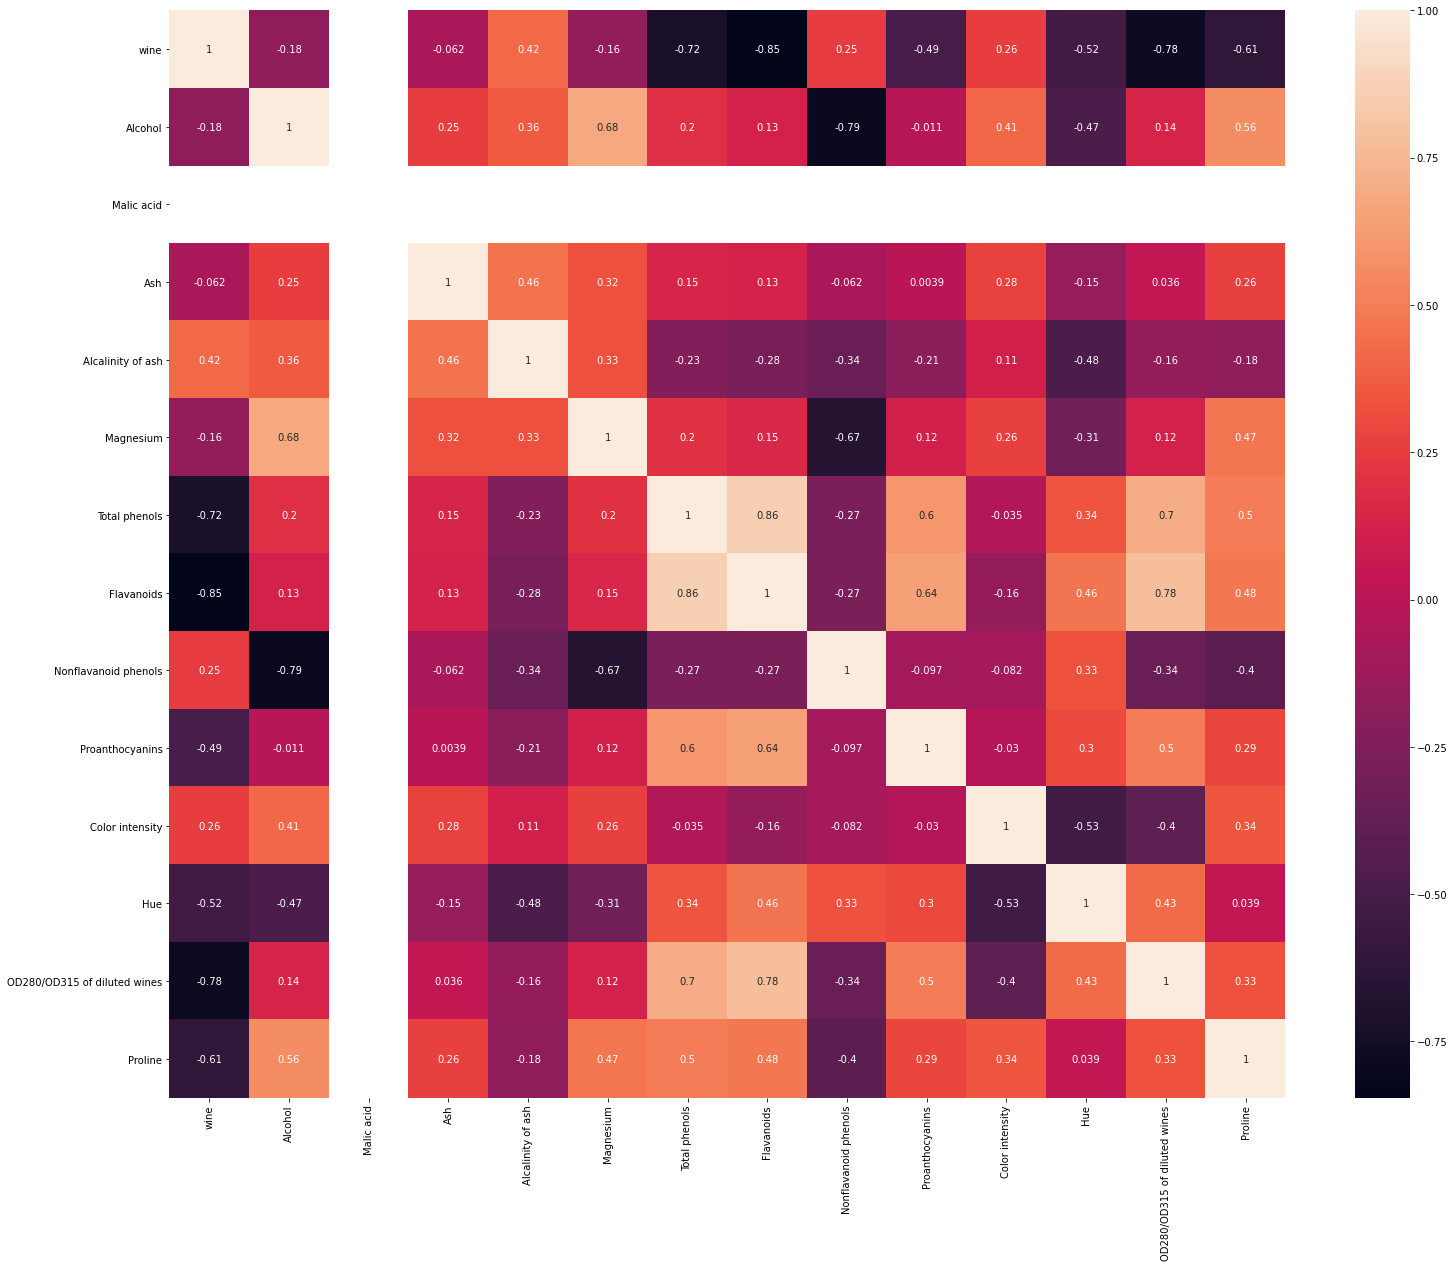

In [47]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),annot=True)

In [48]:
X= data.iloc[:, 1:]
y= data.wine

In [49]:
X.shape,y.shape

((178, 13), (178,))

In [50]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.414214,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.414214,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,1.414214,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.414214,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,1.414214,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [51]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    2
174    3
175    3
176    3
177    3
Name: wine, Length: 178, dtype: int64

In [53]:
!pip install imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({2: 73, 1: 59, 3: 46})
Counter({1: 73, 2: 73, 3: 73})


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test,  y_train, y_test= train_test_split(X_sm,y_sm, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
logistic_model= LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [57]:
y_l_pred= logistic_model.predict(X_test)
accuracy_score(y_test, y_l_pred)

0.9772727272727273

In [58]:
model_bagging= BaggingClassifier(base_estimator=logistic_model,
    n_estimators=50,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=True,
    warm_start=False,
    n_jobs=None,
    random_state=42,
    verbose=0)

In [59]:
model_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50,
                  oob_score=True, random_state=42)

In [60]:
model_bagging.oob_score_

0.9428571428571428

In [61]:
y_pred=model_bagging.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score, classification_report

In [63]:
accuracy_score(y_test, y_pred)

0.9772727272727273

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        16

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.98        44
weighted avg       0.98      0.98      0.98        44



In [66]:
pd.crosstab(y_test, y_pred)

col_0,1,2,3
wine,,,
1,11,1,0
2,0,16,0
3,0,0,16


# Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rf_model= RandomForestClassifier(n_estimators=500,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)


In [87]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, oob_score=True)

In [88]:
rf_model.oob_score_

0.9828571428571429

In [89]:
y_rf_pred=rf_model.predict(X_test)

In [90]:
print(classification_report(y_test,y_rf_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        16

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [91]:
rf_model.oob_score_

0.9828571428571429

In [93]:
y_rf_pred= rf_model.predict(X_test)

In [94]:
print(classification_report(y_test, y_rf_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00        16

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



In [95]:
pd.crosstab(y_test, y_rf_pred)

col_0,1,2,3
wine,,,
1,12,0,0
2,1,15,0
3,0,0,16


In [96]:
test_sample= [13.24,1.609348,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735]

In [97]:
len(test_sample)

13

In [98]:
rf_model.predict([test_sample])

array([1], dtype=int64)